<a href="https://colab.research.google.com/github/Jayaprakash1710/NLP-FlipItNews/blob/main/FlipItNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import html
import re

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

https://drive.google.com/file/d/1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u/view?usp=sharing

In [2]:
!gdown 1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u

Downloading...
From: https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /content/flipitnews-data.csv
100% 5.06M/5.06M [00:00<00:00, 21.8MB/s]


In [3]:
df=pd.read_csv('/content/flipitnews-data.csv')

In [4]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
df.shape

(2225, 2)

In [7]:
df.duplicated().sum()

np.int64(99)

Removing duplicates:

In [9]:
df=df.drop_duplicates()
df.shape

(2126, 2)

<ipython-input-10-1154910130>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')


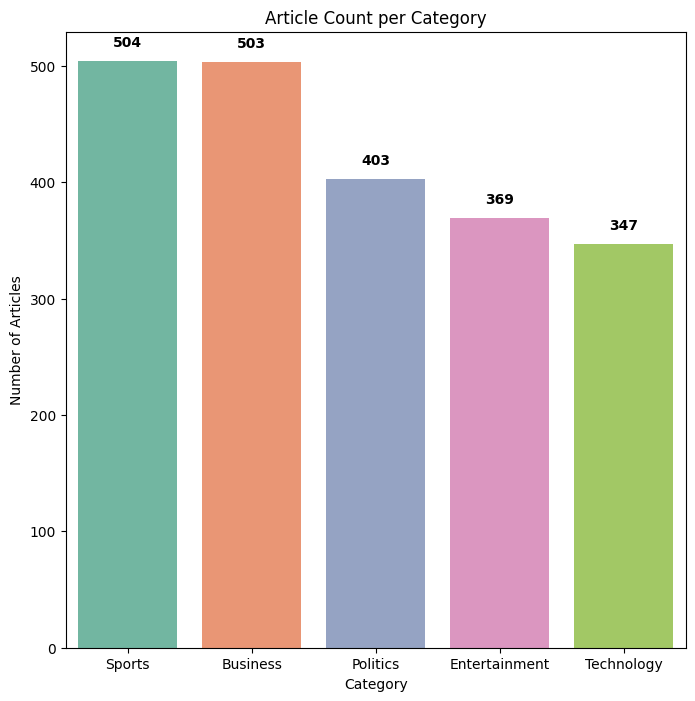

In [10]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8,8))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title('Article Count per Category')
plt.ylabel('Number of Articles')
plt.xlabel('Category')

for i, v in enumerate(category_counts.values):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

# Preprocessing:

In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    elif treebank_tag in ('PRP', 'PRP$'):
        return 'PRON'
    else:
        return wordnet.NOUN

def preprocess_text(text):
    text = html.unescape(text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = text.lower()

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]

    tagged = pos_tag(tokens)

    processed_tokens = []
    for word, pos in tagged:
        wn_pos = get_wordnet_pos(pos)
        if wn_pos == 'PRON':
            processed_tokens.append(word)
        else:
            processed_tokens.append(lemmatizer.lemmatize(word, wn_pos))

    return processed_tokens

df['processed_tokens'] = df['Article'].apply(preprocess_text)
df['processed_text'] = df['processed_tokens'].apply(lambda tokens: ' '.join(tokens))

In [12]:
df.head()

,Category,Article,processed_tokens,processed_text
0,Technology,tv future in the hands of viewers with home th...,"[tv, future, hand, viewer, home, theatre, syst...",tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,"[worldcom, bos, leave, book, alone, former, wo...",worldcom bos leave book alone former worldcom ...
2,Sports,tigers wary of farrell gamble leicester say ...,"[tiger, wary, farrell, gamble, leicester, say,...",tiger wary farrell gamble leicester say rush m...
3,Sports,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...",yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, twelve, raid, box, office, ocean, twel...",ocean twelve raid box office ocean twelve crim...


In [13]:
print(df.head(1).iloc[0][1])
print(df.head(1).iloc[0][2])

tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high-

<ipython-input-13-1180806947>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.head(1).iloc[0][1])
<ipython-input-13-1180806947>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.head(1).iloc[0][2])


<ipython-input-14-396081921>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_length.index, y=avg_length.values, palette='Set2')


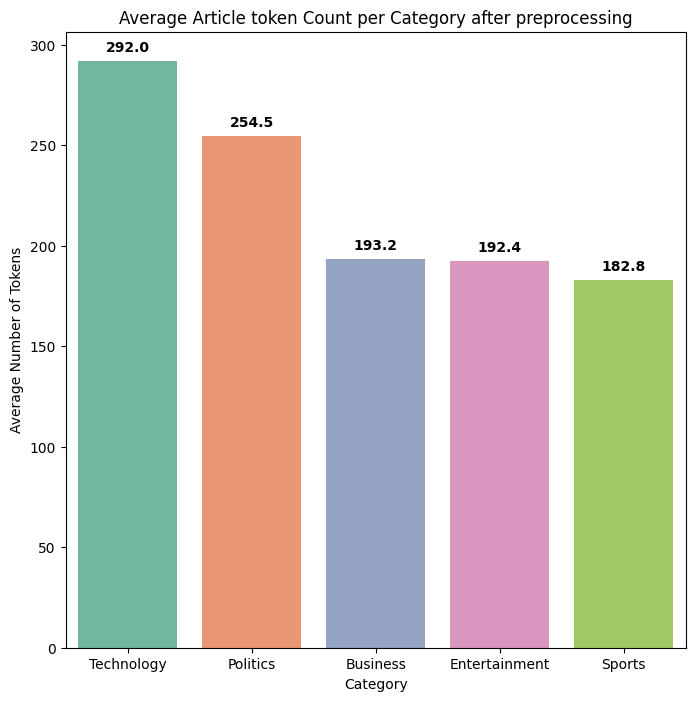

In [14]:
avg_length = df.groupby('Category')['processed_tokens'].apply(lambda x: x.apply(len).mean()).sort_values(ascending=False)

plt.figure(figsize=(8,8))
ax = sns.barplot(x=avg_length.index, y=avg_length.values, palette='Set2')
plt.title('Average Article token Count per Category after preprocessing')
plt.xlabel('Category')
plt.ylabel('Average Number of Tokens')

for i, v in enumerate(avg_length.values):
    ax.text(i, v + 5, f"{v:.1f}", ha='center', fontweight='bold')

plt.show()

# Data preprocessing:

Getting only the required features:

In [15]:
df=df.loc[::,['Category','processed_text']]
df.head()

,Category,processed_text
0,Technology,tv future hand viewer home theatre system plas...
1,Business,worldcom bos leave book alone former worldcom ...
2,Sports,tiger wary farrell gamble leicester say rush m...
3,Sports,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean twelve raid box office ocean twelve crim...


Splitting the data for training, validating, and testing:

In [16]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.25,stratify=df['Category'],random_state=45)

print(f'Train data shape:{train.shape}')
print(f'Test data shape:{test.shape}')

Train data shape:(1594, 2)
Test data shape:(532, 2)


Creating X and y with Tfidf Vectorizer and Label encoding:

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf=TfidfVectorizer()

X_train=tf_idf.fit_transform(train['processed_text'])
X_test=tf_idf.transform(test['processed_text'])

In [18]:
pd.DataFrame(X_train.toarray(),columns=tf_idf.get_feature_names_out()).describe()

,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aan,aara,aarhus,...,zone,zonealarm,zoom,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
count,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,...,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000
mean,0.000036,0.000338,0.000406,0.000103,0.000105,0.000324,0.000065,0.000010,0.000035,0.000037,...,0.000675,0.000023,0.000130,0.000085,0.000045,0.000025,0.000486,0.000076,0.000183,0.000078
std,0.001432,0.006186,0.007924,0.002956,0.004195,0.012954,0.002596,0.000387,0.001383,0.001471,...,0.007428,0.000921,0.002618,0.003376,0.001778,0.001012,0.006147,0.003050,0.006424,0.003109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.057169,0.180479,0.231555,0.096770,0.167495,0.517199,0.103637,0.015434,0.055197,0.058746,...,0.152927,0.036785,0.061728,0.134795,0.071003,0.040390,0.108572,0.121759,0.253612,0.124144


In [19]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

y_train=encoder.fit_transform(train['Category'])
y_test=encoder.transform(test['Category'])

# Evaluation:

In [20]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

In [21]:
def evaluate(model_name,model,y_test,y_pred):
  print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
  print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
  print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
  print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

  cm=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),display_labels=encoder.inverse_transform(model.classes_))
  cm.plot(cmap='Blues',xticks_rotation=45)
  plt.title(f'Confusion matrix of {model_name} model')
  plt.show()

# Naive Bayes:

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [24]:
nb_pred=nb_model.predict(X_test)

Accuracy: 0.9661654135338346
Precision: 0.966592807344354
Recall: 0.9661654135338346
F1 Score: 0.9658318328086958


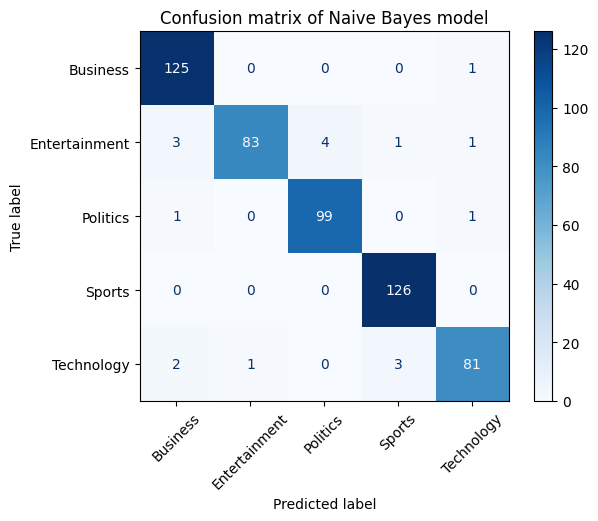

In [25]:
evaluate('Naive Bayes',nb_model,y_test,nb_pred)

# K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

No. of neighbors 3
Accuracy: 0.9530075187969925
Precision: 0.9531941278535706
Recall: 0.9530075187969925
F1 Score: 0.9530174383793408


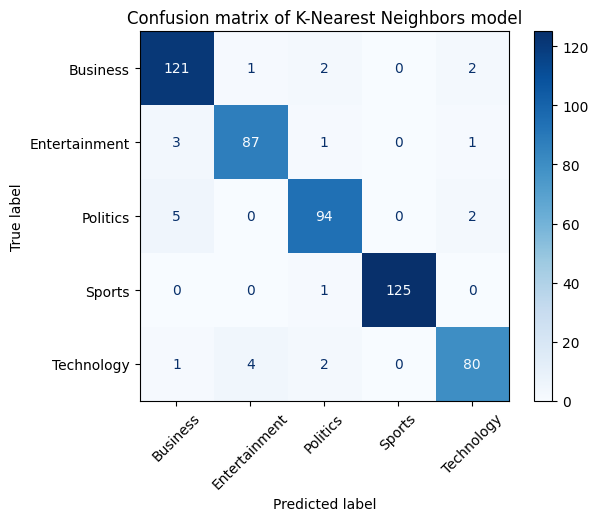

              
-------------------------------------------------
              
No. of neighbors 5
Accuracy: 0.9530075187969925
Precision: 0.953389985116252
Recall: 0.9530075187969925
F1 Score: 0.9530426898704442


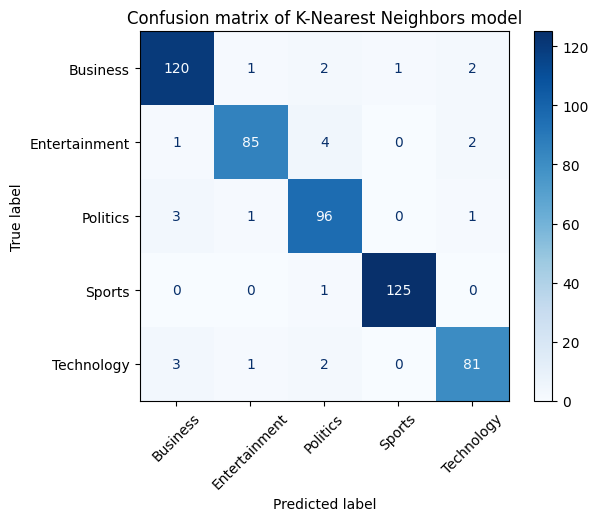

              
-------------------------------------------------
              
No. of neighbors 7
Accuracy: 0.956766917293233
Precision: 0.9571214509881742
Recall: 0.956766917293233
F1 Score: 0.9567332867802193


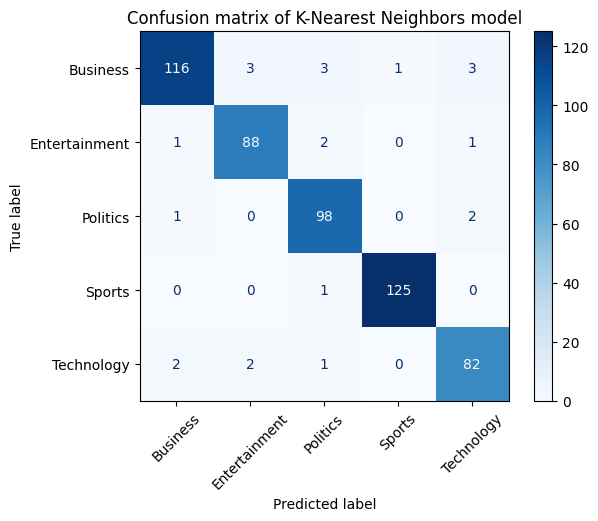

              
-------------------------------------------------
              
No. of neighbors 9
Accuracy: 0.9548872180451128
Precision: 0.9548709319871614
Recall: 0.9548872180451128
F1 Score: 0.9547436740205556


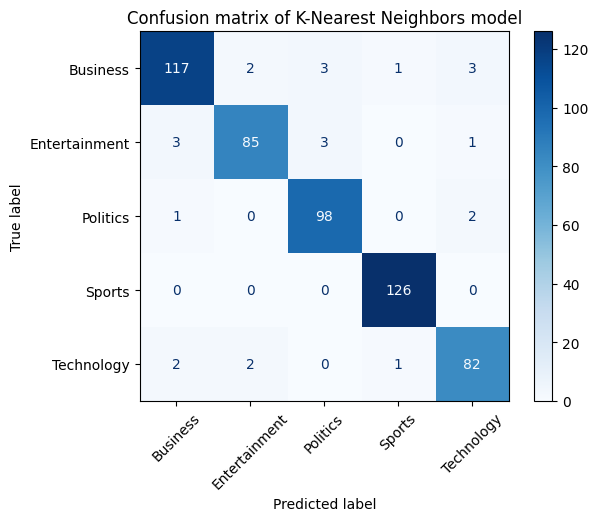

              
-------------------------------------------------
              
No. of neighbors 11
Accuracy: 0.956766917293233
Precision: 0.9568310122040613
Recall: 0.956766917293233
F1 Score: 0.9566322647826092


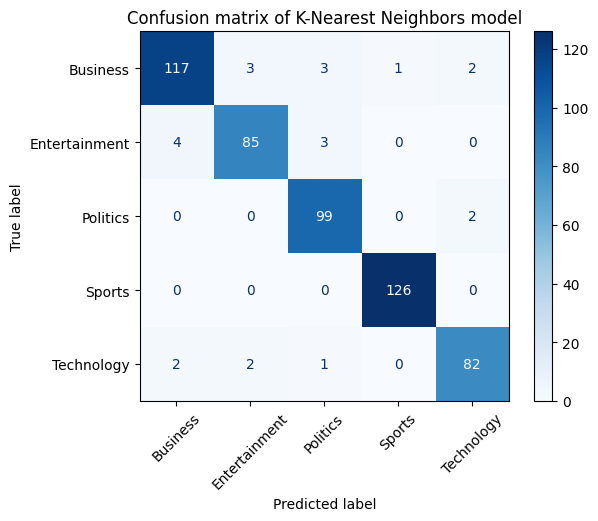

              
-------------------------------------------------
              
No. of neighbors 13
Accuracy: 0.9605263157894737
Precision: 0.9607006991083059
Recall: 0.9605263157894737
F1 Score: 0.9604821015561403


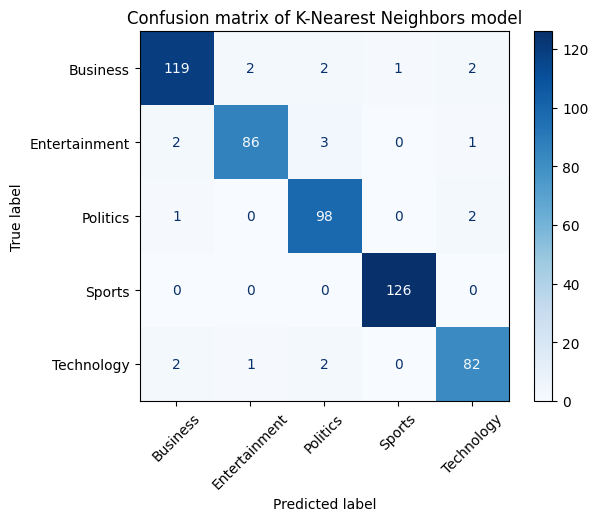

              
-------------------------------------------------
              
No. of neighbors 15
Accuracy: 0.9586466165413534
Precision: 0.9587872967136256
Recall: 0.9586466165413534
F1 Score: 0.958556508469958


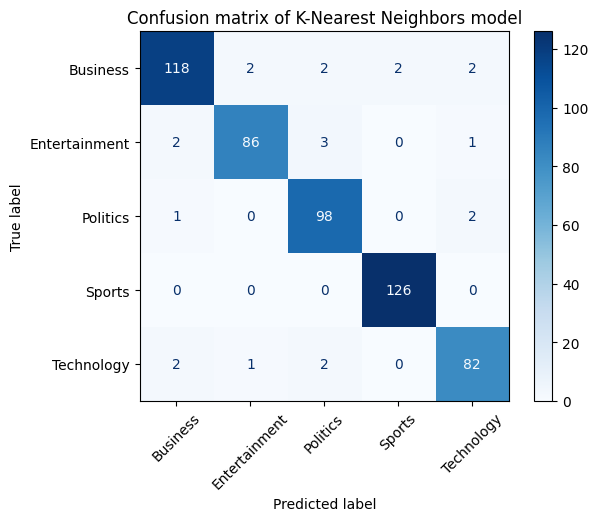

              
-------------------------------------------------
              
No. of neighbors 17
Accuracy: 0.956766917293233
Precision: 0.9569605677919782
Recall: 0.956766917293233
F1 Score: 0.9565982797979597


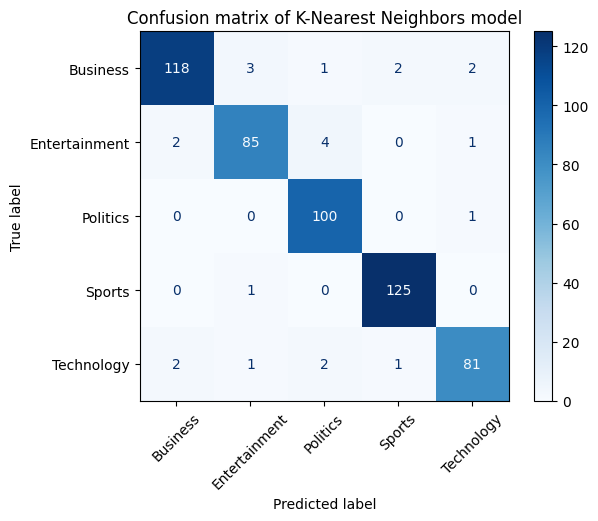

              
-------------------------------------------------
              
No. of neighbors 19
Accuracy: 0.9548872180451128
Precision: 0.9555189256757534
Recall: 0.9548872180451128
F1 Score: 0.9547866072094096


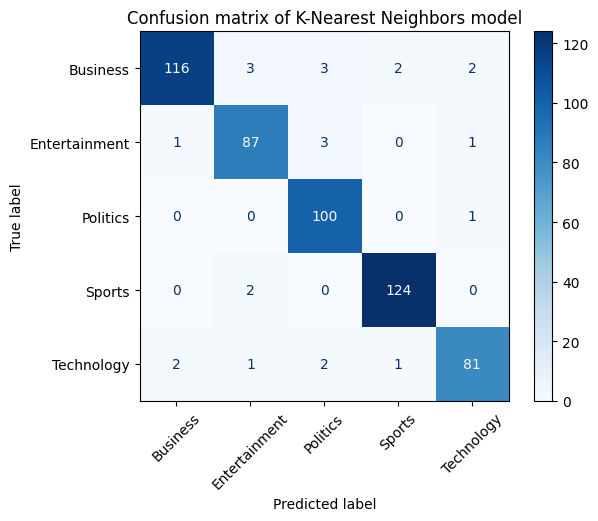

              
-------------------------------------------------
              
No. of neighbors 21
Accuracy: 0.9492481203007519
Precision: 0.9498967018320089
Recall: 0.9492481203007519
F1 Score: 0.9490923452752607


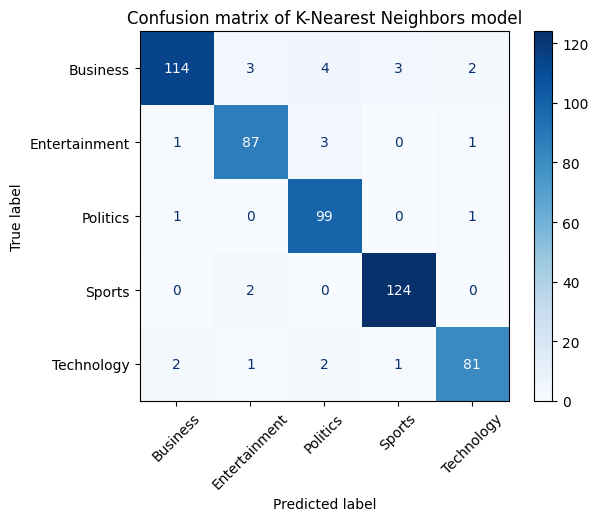

              
-------------------------------------------------
              
No. of neighbors 23
Accuracy: 0.9548872180451128
Precision: 0.9554769813740135
Recall: 0.9548872180451128
F1 Score: 0.9548348046531532


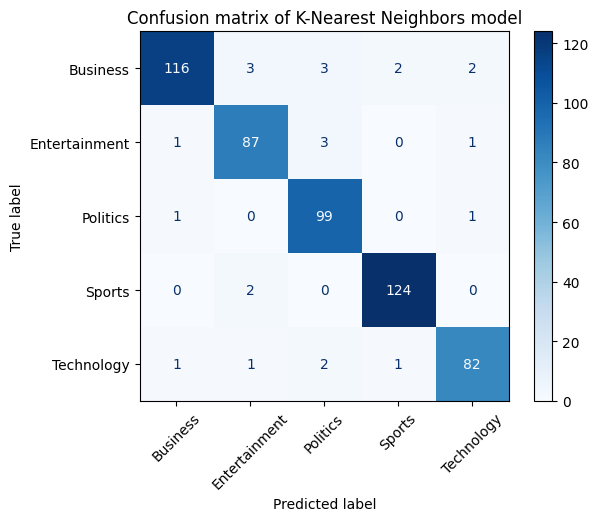

              
-------------------------------------------------
              
No. of neighbors 25
Accuracy: 0.9530075187969925
Precision: 0.9537292728654796
Recall: 0.9530075187969925
F1 Score: 0.9529743723737458


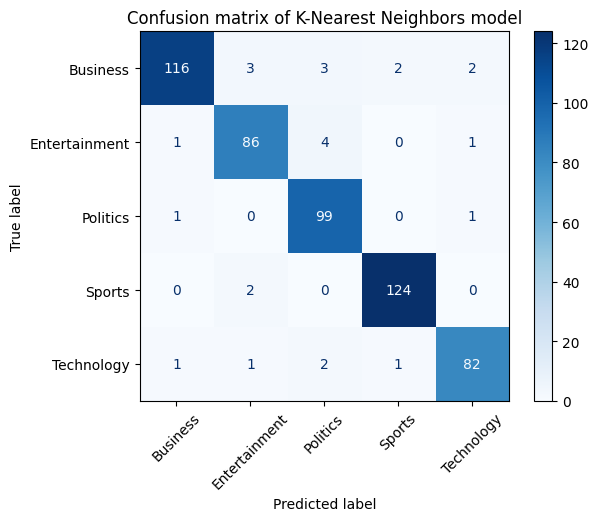

              
-------------------------------------------------
              
No. of neighbors 27
Accuracy: 0.9530075187969925
Precision: 0.9538263532601418
Recall: 0.9530075187969925
F1 Score: 0.9530218417575995


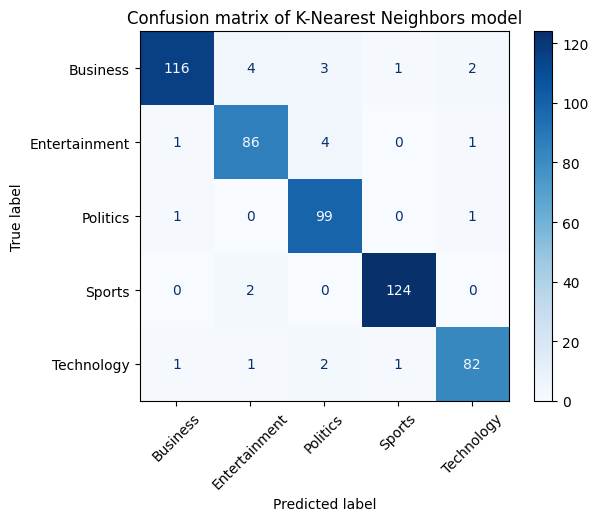

              
-------------------------------------------------
              
No. of neighbors 29
Accuracy: 0.9511278195488722
Precision: 0.9521598764508898
Recall: 0.9511278195488722
F1 Score: 0.9511088617649712


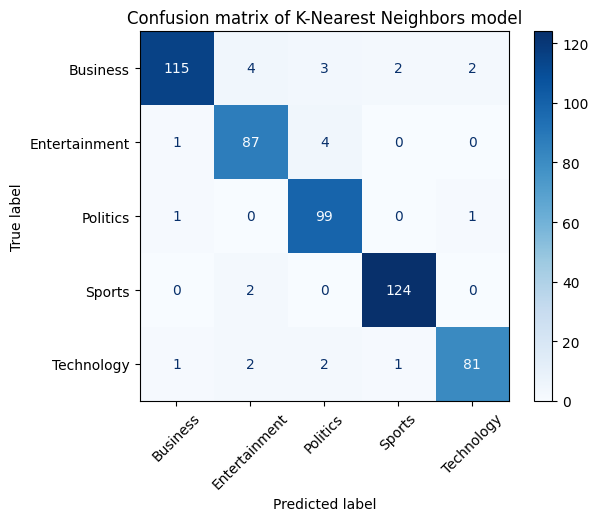

              
-------------------------------------------------
              


In [27]:
for i in range(3,30,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  knn_pred=knn.predict(X_test)
  print(f'No. of neighbors {i}')
  evaluate('K-Nearest Neighbors',knn,y_test,knn_pred)
  print('              ')
  print('-------------------------------------------------')
  print('              ')

# Random Forest:

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)

Accuracy: 0.9605263157894737
Precision: 0.9609770265553792
Recall: 0.9605263157894737
F1 Score: 0.9604269127706072


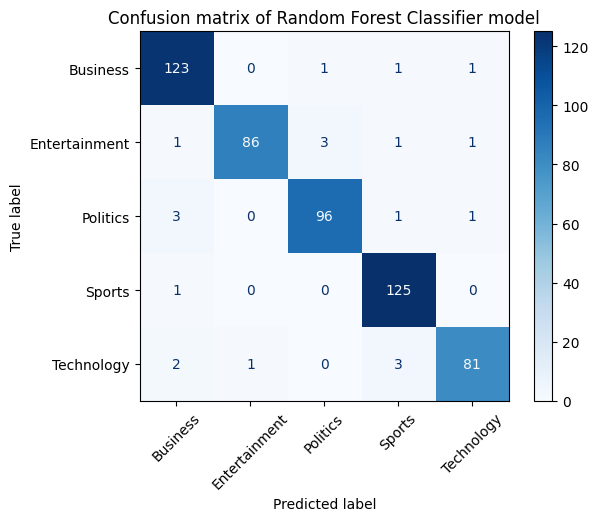

In [30]:
evaluate('Random Forest Classifier',rfc,y_test,rfc_pred)

# Answers to questions:

**Q1: How many news articles are present in the dataset that we have?**

Originally there was 2225 articles present in the dataset. After removing the duplicates the number came down to 2126.

**Q2: Most of the news articles are from which category?**

Most of the news articles are from the category sports.

**Q3: How many articles belong to the ‘Technology’ category?**

The category technology had 347 articles.

**Q4: What are Stop Words and why should they be removed from the text data?**

Stop words are common words in any of the languages that do not carry any significant meaning. These words are not useful while doing text analysis. Removing these words will help in improving the performance of the model by reducing the noise in the text and even if these words are removed, the semantic meaning of the sentence is not lost.

**Q5: Explain the difference between Stemming and Lemmatization.**

Both stemming and lemmatization is the process of bringing words to their root form. While stemming simply chops off the suffix from the word, Lemmatization does not just chop of suffix from the word, it brings the word to the original dictionary form.

Stemming: **Universal -> Univers** sometimes after stemming the word may lose its original meaning because of removing the suffix.

Lemmatizing: **better -> Good** while doing lematization the original meaning of the word is still kept.

**Q7: Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?**

TF-IDF is considered to be more efficient than bag of words when it comes to text classification, spam detection and other NLP tasks.

**Q8: What’s the shape of train & test data sets after performing a 75:25 split?**

